# Ejercicio 1: Preparación del ambiente de trabajo

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (20,20)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('ames_housing 2.csv').drop(columns='Unnamed: 0')

In [3]:
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


# Ejercicio 2: Importación de archivos serializados

In [4]:
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
modelo = pickle.load(open('matias-zapata-actividad07-model.sav', 'rb'))
X_train = pickle.load(open('matias-zapata-actividad07-x_train.sav', 'rb'))
X_test = pickle.load(open('matias-zapata-actividad07-x_test.sav', 'rb'))
y_train = pickle.load(open('matias-zapata-actividad07-y_train.sav', 'rb'))
y_test = pickle.load(open('matias-zapata-actividad07-y_test.sav', 'rb'))

In [5]:
modelo_own = pickle.load(open('felipe-veloso-actividad07.sav', 'rb'))
X_train_own = pickle.load(open('felipe-veloso-actividad07_x_train.sav', 'rb'))
X_test_own = pickle.load(open('felipe-veloso-actividad07_x_test.sav', 'rb'))
y_train_own = pickle.load(open('felipe-veloso-actividad07_y_train.sav', 'rb'))
y_test_own = pickle.load(open('felipe-veloso-actividad07_y_test.sav', 'rb'))

In [6]:
type(modelo_own)

sklearn.model_selection._search.GridSearchCV

In [7]:
y_hat = modelo.predict(X_test)
y_hat_own = modelo_own.best_estimator_.predict(X_test_own)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error , r2_score

In [9]:
print("Test MSE Matias: ", mean_squared_error(y_test,y_hat)) # cercano a 0
print("Test MAE Matias: ", median_absolute_error(y_test,y_hat)) # cercano a 0
print("Test R2 Matias: ", r2_score(y_test,y_hat)) # mas cercano a 1

Test MSE Matias:  1170579199.313832
Test MAE Matias:  15055.25563909774
Test R2 Matias:  0.7940383682484559


In [10]:
print("Test MSE yo: ", mean_squared_error(y_test_own,y_hat_own))
print("Test MAE yo: ", median_absolute_error(y_test_own,y_hat_own))
print("Test R2 yo: ", r2_score(y_test_own,y_hat_own))

Test MSE yo:  2729302042.568219
Test MAE yo:  22540.433544303785
Test R2 yo:  0.5197834520212884


In [11]:
dec_tree = DecisionTreeRegressor().fit(X_train,y_train)

In [12]:
y_hat = dec_tree.predict(X_test)

In [13]:
print("Test MSE: ", mean_squared_error(y_test,y_hat))
print("Test MAE: ", median_absolute_error(y_test,y_hat))
print("Test R2: ", r2_score(y_test,y_hat))

Test MSE:  1853284098.1907964
Test MAE:  18000.0
Test R2:  0.67391747847022


El modelo dematias tiende a tener mejores metricas, el comportamiento de su score r2 es mucho mejor, y su mse al ser tan altamente variable, tiene mrjo performance

## Ejercicio 4: Reporte las métricas de desempeño

In [19]:
from sklearn.ensemble import BaggingRegressor

In [20]:
tmp_mse_test , tmp_mae_test, tmp_r2_test = [] , [], []

n_tree = range(20,1000,50)

for i in n_tree:
    tmp_bad_model = BaggingRegressor(n_estimators=i, random_state=11238).fit(X_train, y_train)
    tmp_mse_test.append(mean_squared_error(y_test,tmp_bad_model.predict(X_test)))
    tmp_mae_test.append(median_absolute_error(y_test,tmp_bad_model.predict(X_test)))
    tmp_r2_test.append(r2_score(y_test,tmp_bad_model.predict(X_test)))

In [21]:
params = [[1, tmp_r2_test, r2_score(y_test,tmp_bad_model.predict(X_test)), 'r2'],
          [2, tmp_mse_test, mean_squared_error(y_test,tmp_bad_model.predict(X_test)), 'mse'],
          [3, tmp_mae_test, median_absolute_error(y_test,tmp_bad_model.predict(X_test)), 'mae']]

In [23]:
def plot_bagging_behavior( scores, metric,  n_sims):
    tmp_x_range = ['RT: {}'.format(i) for i in n_sims]
    plt.plot(scores, 'o--', lw=1,color='dodgerblue', label=r'RegTree')
    plt.axhline(metric,color='tomato', label=r'Bagging')
    plt.xticks(range(len(tmp_x_range)),tmp_x_range, rotation=90)
    plt.legend();


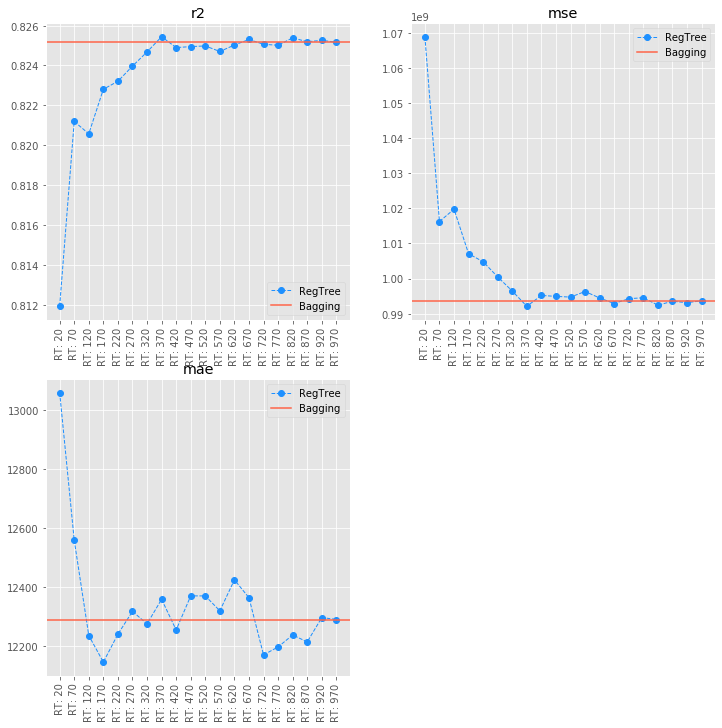

In [25]:
plt.figure(figsize=(12,12))

for i in params:
    plt.subplot(2,2,i[0])
    plot_bagging_behavior(i[1],i[2], n_tree)
    plt.title(str(i[3]))
    plt.tight_layout